In [1]:
import os

import ananse
import networkx as nx
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()

'/bank/experiments/2022-04-jordi'

In [2]:
ananse.__version__  # develop branch (commit shouldn't matter, but is 33bc388)

'0.3.0+106.g33bc388'

In [3]:
# what does the data look like?
fname = "ananse_orthofinder/network/neoblasts.tsv"
df = pd.read_table(fname, nrows=2)

# split tf and target
df[["tf", "target"]] = df["tf_target"].str.split(ananse.SEPARATOR, expand=True)
# sort columns
cols = [col for col in ["tf", "target", "prob", "tf_expression", "target_expression", "weighted_binding", "activity"] if col in df.columns]
df = df[cols]

df

tf          target      prob  tf_expression  target_expression  \
0  SMEST000519001  SMEST000022001  0.435236       0.360775           0.297495   
1  SMEST000519001  SMEST000026001  0.141888       0.360775           0.094758   

   weighted_binding  activity  
0          0.970654  0.112019  
1          0.000000  0.112019

In [4]:
orthologs = pd.read_table("orthologs_with_orthofinder.tsv")
orthologs[orthologs["orthologs"].str.contains("HNF4")]

# hnf4 = "SMEST014588001"

gene_name                                          orthologs  \
497   SMEST008787001  AR/ESR1/ESR2/ESRRA/ESRRB/ESRRG/HNF4A/HNF4G/NR1...   
543   SMEST009304003  AR/ESR1/ESR2/ESRRA/ESRRB/ESRRG/HNF4A/HNF4G/NR1...   
830   SMEST014588001                                        HNF4A/HNF4G   
3164  SMEST054304002  AR/ESR1/ESR2/ESRRA/ESRRB/ESRRG/HNF4A/HNF4G/NR2...   
7506    SmMSTRG.3137  AR/ESR1/ESR2/ESRRA/ESRRB/ESRRG/HNF4A/HNF4G/NR1...   
8351    SmMSTRG.7078  AR/ESR1/ESR2/ESRRA/ESRRB/ESRRG/HNF4A/HNF4G/NR1...   
8582    SmMSTRG.8332  AR/ESR1/ESR2/ESRRA/ESRRB/ESRRG/HNF4A/HNF4G/NR1...   

                       source  
497       curated_orthogroups  
543       curated_orthogroups  
830   curated_human_orthologs  
3164      curated_orthogroups  
7506      curated_orthogroups  
8351      curated_orthogroups  
8582      curated_orthogroups

In [5]:
def load_df(fname, usecols=None, tf=None):
    df = pd.read_table(fname, usecols=usecols)

    # split tf and target
    df[["tf", "target"]] = df["tf_target"].str.split(ananse.SEPARATOR, expand=True)
    # sort columns
    cols = [col for col in ["tf", "target", "prob", "tf_expression", "target_expression", "weighted_binding", "activity"] if col in df.columns]
    df = df[cols]

    # filter for tf
    if tf:
        df = df[df["tf"] == tf]

    df.sort_values("prob", ascending=False, inplace=True)
    df["rank"] = rankdata(df["prob"], method="dense")
    return df

    
fname = "ananse_orthofinder/network/parenchymal.tsv"
usecols = ["tf_target", "prob", "weighted_binding"]
hnf4 = "SMEST014588001"
par = load_df(fname, usecols, hnf4)

print(par.shape)
par.head(3)

(26965, 5)


tf          target      prob  weighted_binding   rank
2282009  SMEST014588001   SmMSTRG.15016  0.937910          0.998429  26302
2279621  SMEST014588001    SmMSTRG.1092  0.937161          0.996481  26301
2273651  SMEST014588001  SMEST048830001  0.937097          0.996024  26300

In [6]:
fname = "ananse_orthofinder/network/phagocytes.tsv"
usecols = ["tf_target", "prob", "weighted_binding"]
hnf4 = "SMEST014588001"
phag = load_df(fname, usecols, hnf4)

print(phag.shape)
phag.head(3)

(26965, 5)


tf          target      prob  weighted_binding   rank
2282009  SMEST014588001   SmMSTRG.15016  0.950429          0.998256  26062
2289194  SMEST014588001    SmMSTRG.5305  0.949737          0.999444  26061
2273651  SMEST014588001  SMEST048830001  0.949478          0.995578  26060

In [7]:
# parenchymal genes differently regulated with HNF4 knockdown
par_down = ['SMEST001708001', 'SMEST016303003', 'SMEST022809002', 'SMEST023253001', 'SMEST025209001', 'SMEST046710001', 'SMEST055398002', 'SMEST056326001', 'SMEST056331001', 'SMEST079667001', 'SmMSTRG.15711', 'SmMSTRG.16947', 'SmMSTRG.18305', 'SmMSTRG.20549', 'SmMSTRG.20612', 'SmMSTRG.22394', 'SmMSTRG.3795', 'SmMSTRG.4394', 'SmMSTRG.5421', 'SmMSTRG.6332', 'SmMSTRG.8056', 'SmMSTRG.849', 'SmMSTRG.8986']
par_up = ['SMEST007996001', 'SMEST012332001', 'SMEST016783001', 'SMEST043644001', 'SmMSTRG.14376', 'SmMSTRG.3179', 'SmMSTRG.6264', 'SmMSTRG.6988']

# phagocyte genes differently regulated with HNF4 knockdown
phag_down = ['SMEST000653001', 'SMEST001708001', 'SMEST004200001', 'SMEST005054001', 'SMEST005752001', 'SMEST007145001', 'SMEST014167001', 'SMEST014578002', 'SMEST016303003', 'SMEST019555001', 'SMEST020341001', 'SMEST023842001', 'SMEST027140001', 'SMEST029404001', 'SMEST031104001', 'SMEST031106001', 'SMEST032396001', 'SMEST032522001', 'SMEST032861001', 'SMEST037144001', 'SMEST037203001', 'SMEST037355001', 'SMEST040790001', 'SMEST042103001', 'SMEST045007001', 'SMEST047314001', 'SMEST053503001', 'SMEST055398002', 'SMEST056013003', 'SMEST056326001', 'SMEST056331001', 'SMEST056697001', 'SMEST057441001', 'SMEST060556001', 'SMEST063595001', 'SMEST064049001', 'SMEST064358001', 'SMEST065078001', 'SMEST067685001', 'SMEST069640002', 'SmMSTRG.10067', 'SmMSTRG.10373', 'SmMSTRG.10790', 'SmMSTRG.112', 'SmMSTRG.11383', 'SmMSTRG.11642', 'SmMSTRG.11706', 'SmMSTRG.12118', 'SmMSTRG.12495', 'SmMSTRG.12536', 'SmMSTRG.12889', 'SmMSTRG.13362', 'SmMSTRG.13383', 'SmMSTRG.1359', 'SmMSTRG.14074', 'SmMSTRG.15218', 'SmMSTRG.15290', 'SmMSTRG.15564', 'SmMSTRG.15711', 'SmMSTRG.15864', 'SmMSTRG.16823', 'SmMSTRG.16825', 'SmMSTRG.16947', 'SmMSTRG.17703', 'SmMSTRG.18305', 'SmMSTRG.18600', 'SmMSTRG.18862', 'SmMSTRG.18883', 'SmMSTRG.19217', 'SmMSTRG.20455', 'SmMSTRG.21830', 'SmMSTRG.229', 'SmMSTRG.23048', 'SmMSTRG.2305', 'SmMSTRG.23144', 'SmMSTRG.2314', 'SmMSTRG.23615', 'SmMSTRG.2567', 'SmMSTRG.287', 'SmMSTRG.303', 'SmMSTRG.313', 'SmMSTRG.3195', 'SmMSTRG.3795', 'SmMSTRG.3917', 'SmMSTRG.4394', 'SmMSTRG.4400', 'SmMSTRG.5421', 'SmMSTRG.5753', 'SmMSTRG.5754', 'SmMSTRG.6009', 'SmMSTRG.6993', 'SmMSTRG.6994', 'SmMSTRG.7219', 'SmMSTRG.7228', 'SmMSTRG.7524', 'SmMSTRG.8128', 'SmMSTRG.8273', 'SmMSTRG.849', 'SmMSTRG.8818', 'SmMSTRG.9782']
phag_up = ['SMEST005882002', 'SMEST007996001', 'SMEST012332001', 'SMEST013689001', 'SMEST014775001', 'SMEST017516001', 'SMEST020142006', 'SMEST022272002', 'SMEST022275001', 'SMEST025147001', 'SMEST032745001', 'SMEST036937001', 'SMEST041250001', 'SMEST041792001', 'SMEST047737002', 'SMEST047739001', 'SMEST061526002', 'SMEST062480001', 'SMEST063805001', 'SMEST064360001', 'SMEST070650002', 'SMEST074789007', 'SMEST076526001', 'SmMSTRG.1012', 'SmMSTRG.10952', 'SmMSTRG.11246', 'SmMSTRG.1221', 'SmMSTRG.13151', 'SmMSTRG.13369', 'SmMSTRG.13844', 'SmMSTRG.14536', 'SmMSTRG.1561', 'SmMSTRG.16518', 'SmMSTRG.16895', 'SmMSTRG.16985', 'SmMSTRG.17253', 'SmMSTRG.18241', 'SmMSTRG.1834', 'SmMSTRG.18683', 'SmMSTRG.20223', 'SmMSTRG.20396', 'SmMSTRG.21594', 'SmMSTRG.21681', 'SmMSTRG.2217', 'SmMSTRG.22764', 'SmMSTRG.23033', 'SmMSTRG.2590', 'SmMSTRG.5729', 'SmMSTRG.6035', 'SmMSTRG.6185', 'SmMSTRG.7529', 'SmMSTRG.8482', 'SmMSTRG.8699', 'SmMSTRG.8707', 'SmMSTRG.985']


In [8]:
# do gene names compare between the email and the latest run?
par_genes = set(par["target"])
for genes in [par_down, par_up]:
    genes = set(genes)
    print(len(genes), "total genes")
    print(int(100*len(genes)/len(genes & par_genes)), "% found in network")
    print()

phag_genes = set(phag["target"])
for genes in [phag_down, phag_up]:
    genes = set(genes)
    print(len(genes), "total genes")
    print(int(100*len(genes)/len(genes & phag_genes)), "% found in network")
    print()

23 total genes
100 % found in network

8 total genes
100 % found in network

100 total genes
100 % found in network

55 total genes
100 % found in network



# phagocytes

In [9]:
down = phag[phag["target"].isin(phag_down)]
up = phag[phag["target"].isin(phag_up)]
rest = phag[~phag["target"].isin(phag_down + phag_up)]

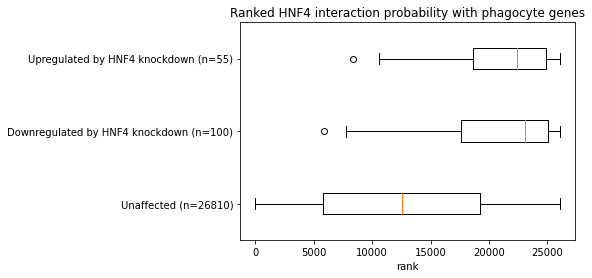

In [10]:
col = "rank"
my_dict = {
    f'Unaffected (n={len(rest)})': rest[col],
    f'Downregulated by HNF4 knockdown (n={len(down)})': down[col], 
    f'Upregulated by HNF4 knockdown (n={len(up)})': up[col], 
}

fig, ax = plt.subplots()
plt.title("Ranked HNF4 interaction probability with phagocyte genes")

ax.boxplot(my_dict.values(), vert=False)
ax.set_yticklabels(my_dict.keys())
ax.set_xlabel(col)
plt.savefig(f"hnf4_knockdown_phagocytes_{col}", dpi=300)
plt.show()

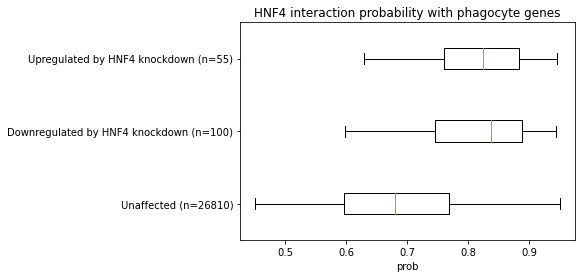

In [11]:
col = "prob"
my_dict = {
    f'Unaffected (n={len(rest)})': rest[col],
    f'Downregulated by HNF4 knockdown (n={len(down)})': down[col], 
    f'Upregulated by HNF4 knockdown (n={len(up)})': up[col], 
}

fig, ax = plt.subplots()
plt.title("HNF4 interaction probability with phagocyte genes")

ax.boxplot(my_dict.values(), vert=False)
ax.set_yticklabels(my_dict.keys())
ax.set_xlabel(col)
plt.savefig(f"hnf4_knockdown_phagocytes_{col}", dpi=300)
plt.show()

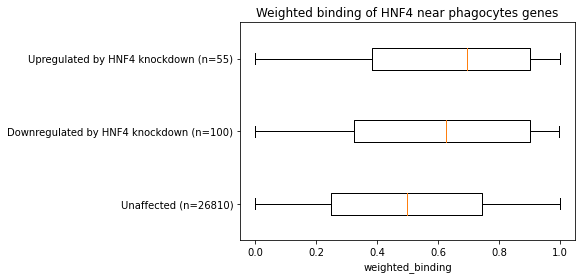

In [12]:
col = "weighted_binding"
my_dict = {
    f'Unaffected (n={len(rest)})': rest[col],
    f'Downregulated by HNF4 knockdown (n={len(down)})': down[col], 
    f'Upregulated by HNF4 knockdown (n={len(up)})': up[col], 
}

fig, ax = plt.subplots()
plt.title("Weighted binding of HNF4 near phagocytes genes")

ax.boxplot(my_dict.values(), vert=False)
ax.set_yticklabels(my_dict.keys())
ax.set_xlabel(col)
plt.savefig(f"hnf4_knockdown_phagocytes_{col}", dpi=300)
plt.show()

# parenchymal

In [13]:
down = par[par["target"].isin(par_down)]
up = par[par["target"].isin(par_up)]
rest = par[~par["target"].isin(par_down + par_up)]

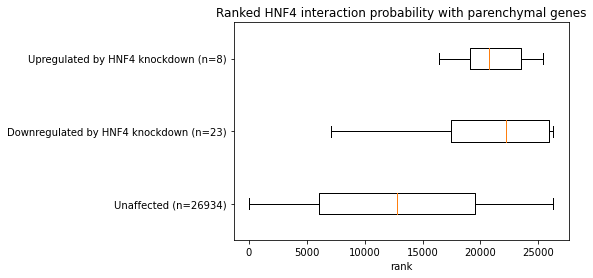

In [14]:
col = "rank"
my_dict = {
    f'Unaffected (n={len(rest)})': rest[col],
    f'Downregulated by HNF4 knockdown (n={len(down)})': down[col], 
    f'Upregulated by HNF4 knockdown (n={len(up)})': up[col], 
}

fig, ax = plt.subplots()
plt.title("Ranked HNF4 interaction probability with parenchymal genes")

ax.boxplot(my_dict.values(), vert=False)
ax.set_yticklabels(my_dict.keys())
ax.set_xlabel(col)
plt.savefig(f"hnf4_knockdown_parenchymal_{col}", dpi=300)
plt.show()

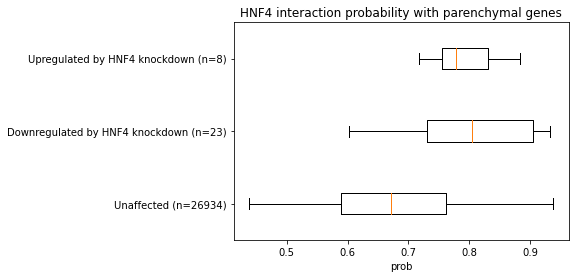

In [15]:
col = "prob"
my_dict = {
    f'Unaffected (n={len(rest)})': rest[col],
    f'Downregulated by HNF4 knockdown (n={len(down)})': down[col], 
    f'Upregulated by HNF4 knockdown (n={len(up)})': up[col], 
}

fig, ax = plt.subplots()
plt.title("HNF4 interaction probability with parenchymal genes")

ax.boxplot(my_dict.values(), vert=False)
ax.set_yticklabels(my_dict.keys())
ax.set_xlabel(col)
plt.savefig(f"hnf4_knockdown_parenchymal_{col}", dpi=300)
plt.show()

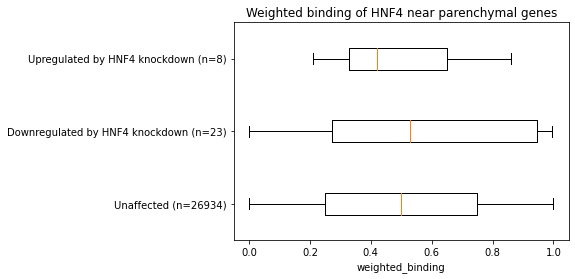

In [16]:
col = "weighted_binding"
my_dict = {
    f'Unaffected (n={len(rest)})': rest[col],
    f'Downregulated by HNF4 knockdown (n={len(down)})': down[col], 
    f'Upregulated by HNF4 knockdown (n={len(up)})': up[col], 
}

fig, ax = plt.subplots()
plt.title("Weighted binding of HNF4 near parenchymal genes")

ax.boxplot(my_dict.values(), vert=False)
ax.set_yticklabels(my_dict.keys())
ax.set_xlabel(col)
plt.savefig(f"hnf4_knockdown_parenchymal_{col}", dpi=300)
plt.show()